In [4]:
! pip install names

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import random
import names

# Creating df-

In [ ]:
df = pd.read_excel("Sales.xlsx")
df.head(2)

,OrderID,OrderDate,PropertyID,ProductID,Quantity,ProductName,ProductCategory,Price,PropertyCity,PropertyState,sales
0,1,2015-01-01,17,41,1.0,Office Chair,Furnishings,85,Las Vegas,Nevada,85.0
1,163,2015-01-25,17,41,2.0,Office Chair,Furnishings,85,Las Vegas,Nevada,170.0


# Cheacking the correlation-

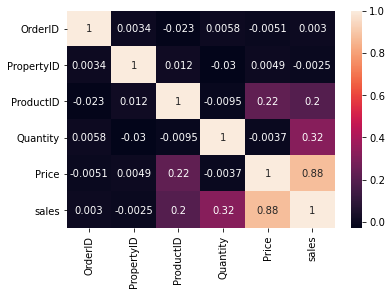

In [ ]:
sns.heatmap(df.corr(),annot = True);

In [ ]:
df.columns

Index(['OrderID', 'OrderDate', 'PropertyID', 'ProductID', 'Quantity',
       'ProductName', 'ProductCategory', 'Price', 'PropertyCity',
       'PropertyState', 'sales'],
      dtype='object')

# Outliers-

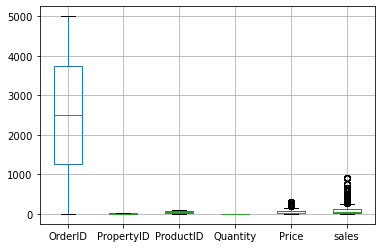

In [ ]:
df.boxplot();

# nulls-

In [ ]:
df.isnull().sum()

OrderID             0
OrderDate           0
PropertyID          0
ProductID           0
Quantity           20
ProductName         0
ProductCategory     0
Price               0
PropertyCity        0
PropertyState       0
sales               8
dtype: int64

In [ ]:
df = df [["Quantity","sales"]]
df.head(2)

,Quantity,sales
0,1.0,85.0
1,2.0,170.0


# Outliers-

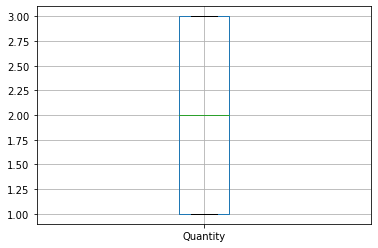

In [ ]:
df.boxplot("Quantity");

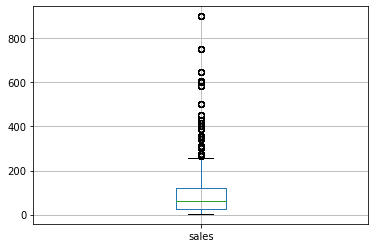

In [ ]:
df.boxplot("sales"); # never do any menipulation in your target variable.

# Cheacking the distribution-

In [ ]:
df['sales'].describe()

count    4992.000000
mean      106.723758
std       131.524376
min         3.000000
25%        27.000000
50%        60.000000
75%       120.000000
max       900.000000
Name: sales, dtype: float64

# Calculating  outliers-

In [ ]:
q1 = 27
q2 = 60
q3 = 120
iqr = q3-q1
uw = q3+(1.5*iqr)
lw = q1-(1.5*iqr)

In [ ]:
df["sales"].shape[0]

5000

# Calculating percent of outliers-

In [ ]:
(len(df[df['sales']>uw]['sales'])/df['sales'].shape[0]*100)

8.74

# Handling outliers-


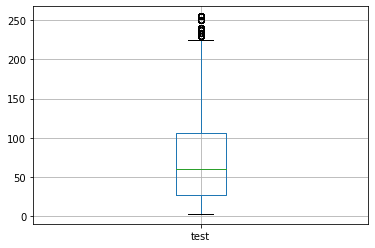

In [ ]:
# Replacing Outliers with Mean value of the dist
df['test'] = np.where(df['sales'] > uw, df['sales'].mean(), df['sales']) # Where function is an equivalent to IF function
df.boxplot('test');

In [ ]:
#Replacing outliers with uv value of list & creating a new column
df['test'] = np.where(df['sales']>uw,uw,df['sales'])#where function is an equivalent to if function.
df['test']

0        85.0
1       170.0
2       255.0
3       170.0
4       259.5
        ...  
4995     38.0
4996    240.0
4997     13.0
4998     26.0
4999     14.0
Name: test, Length: 5000, dtype: float64

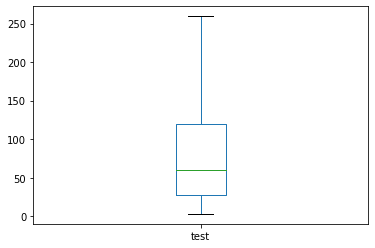

In [ ]:
df.boxplot('test',grid = False);

# Handling missing value-

In [ ]:
df.head(2)

,Quantity,sales,test
0,1.0,85.0,85.0
1,2.0,170.0,170.0


In [ ]:
df.drop(columns = 'test', inplace = True)
df.head(2)

,Quantity,sales
0,1.0,85.0
1,2.0,170.0


In [ ]:
df.isnull().sum()

Quantity    20
sales        8
dtype: int64

In [ ]:
# Numerical = Replace it with Either Mean or Median
# Categorical = Replace it with Mode or a constant

In [ ]:
#central imputation to replace null
from sklearn.impute import  SimpleImputer

In [ ]:
#Handling nulls in entire df-
df = pd.DataFrame(SimpleImputer().fit_transform(df))
df.columns = ['quantity','sales']
df.head()

,quantity,sales
0,1.0,85.0
1,2.0,170.0
2,3.0,255.0
3,2.0,170.0
4,2.0,300.0


In [ ]:
df.isnull().sum()

quantity    0
sales       0
dtype: int64

# Scalability issues-

In [ ]:
df.describe()

,quantity,sales
count,5000.000000,5000.000000
mean,2.019277,106.723758
std,0.809791,131.419094
min,1.000000,3.000000
25%,1.000000,27.000000
50%,2.000000,60.000000
75%,3.000000,120.000000
max,3.000000,900.000000


# Importing functions for standardizations-

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
#standardizing the df-
stddf = pd.DataFrame(StandardScaler().fit_transform(df), columns = ['Quantity', 'Sales'])
normdf = pd.DataFrame(MinMaxScaler().fit_transform(df), columns = ['Quantity', 'Sales'])

In [ ]:
stddf.describe()

,Quantity,Sales
count,5.000000e+03,5.000000e+03
mean,-1.537881e-16,1.066258e-16
std,1.000100e+00,1.000100e+00
min,-1.258818e+00,-7.893384e-01
25%,-1.258818e+00,-6.066982e-01
50%,-2.380743e-02,-3.555681e-01
75%,1.211203e+00,1.010323e-01
max,1.211203e+00,6.036836e+00


In [ ]:
normdf.describe()

,Quantity,Sales
count,5000.000000,5000.000000
mean,0.509639,0.115634
std,0.404895,0.146510
min,0.000000,0.000000
25%,0.000000,0.026756
50%,0.500000,0.063545
75%,1.000000,0.130435
max,1.000000,1.000000


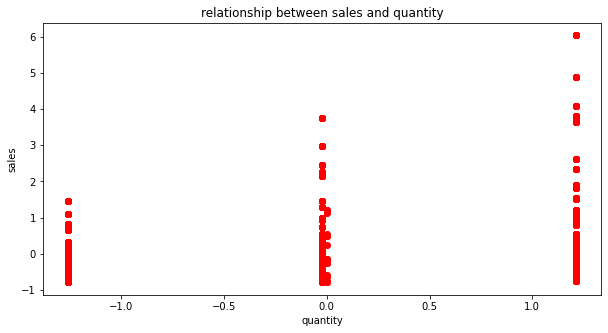

In [ ]:
plt.figure(figsize = (10,5))
plt.title("relationship between sales and quantity")
plt.scatter(stddf["Quantity"],stddf['Sales'],color = 'r')
plt.xlabel("quantity")
plt.ylabel("sales");

# Choose independent and target variable

In [ ]:
x = stddf["Quantity"]
y = stddf[["Sales"]]

In [ ]:
x.head(2)

,Quantity
0,-1.258818
1,-0.023807


In [ ]:
y.head(2)

,Sales
0,-0.165318
1,0.481533


# Train test split

In [ ]:
stddf.shape

(5000, 2)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test = train_test_split(x,y,test_size = 0.2,random_state = 101)
#0.2 means 20% will be kept for testing and 80% for training

In [ ]:
print("independent variable for taining the model",x_train.shape,'\n',x_train.head(2))

independent variable for taining the model (4000, 1) 
       Quantity
3413  1.211203
1610  1.211203


In [ ]:
print("target variable for taining the model",y_train.shape,'\n',y_train.head(2))

target variable for taining the model (1000, 1) 
       Quantity
1718 -0.023807
2511  1.211203


In [ ]:
print("independent variable for testing the model",x_test.shape,'\n',x_test.head(2))

independent variable for taining the model (4000, 1) 
          Sales
3413 -0.355568
1610 -0.127268


In [ ]:
print("target variable for comparing the prediction of model's predictions",y_test.shape,'\n',y_test.head(2))

target variable for comparing the prediction of model's predictions (1000, 1) 
          Sales
1718 -0.492548
2511 -0.424058


# Build the model

In [ ]:
#training the model
model = LinearRegression().fit(x_train, y_train) # fit - application

ValueError: Found input variables with inconsistent numbers of samples: [4000, 1000]